In [1]:
import yfinance as yf
import pandas as pd
tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-12-31')
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date  Adj Close      Close       High        Low       Open  \
Ticker                  TSLA       TSLA       TSLA       TSLA       TSLA   
0      2020-01-02  28.684000  28.684000  28.713333  28.114000  28.299999   
1      2020-01-03  29.534000  29.534000  30.266666  29.128000  29.366667   
2      2020-01-06  30.102667  30.102667  30.104000  29.333332  29.364668   
3      2020-01-07  31.270666  31.270666  31.441999  30.224001  30.760000   
4      2020-01-08  32.809334  32.809334  33.232666  31.215334  31.580000   

Price      Volume  
Ticker       TSLA  
0       142981500  
1       266677500  
2       151995000  
3       268231500  
4       467164500  


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) ' +
                  'AppleWebKit/537.36 (KHTML, like Gecko) ' +
                  'Chrome/58.0.3029.110 Safari/537.3'
}
response = requests.get(url, headers=headers)
# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', attrs={'class': 'historical_data_table table'})
    if table:
        # Convertir la tabla HTML a un DataFrame de pandas
        tesla_revenue = pd.read_html(str(table))[0]
        tesla_revenue = tesla_revenue.rename(columns={'Date': 'Fecha', 'Revenue': 'Ingresos'})
        tesla_revenue = tesla_revenue.dropna()
        print(tesla_revenue.tail())
    else:
        print("No se encontró la tabla de ingresos en la página.")
else:
    print(f"Error al acceder a la página: {response.status_code}")

    Tesla Annual Revenue (Millions of US $)  \
10                                     2013   
11                                     2012   
12                                     2011   
13                                     2010   
14                                     2009   

   Tesla Annual Revenue (Millions of US $).1  
10                                    $2,013  
11                                      $413  
12                                      $204  
13                                      $117  
14                                      $112  


/tmp/ipykernel_641/4168387720.py:30: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


In [8]:
import yfinance as yf
import pandas as pd
gme_data = yf.download('GME', start='2020-01-01', end='2023-12-31')
gme_data.reset_index(inplace=True)
print(gme_data.head())

[*********************100%***********************]  1 of 1 completed

Price        Date Adj Close   Close    High     Low    Open    Volume
Ticker                  GME     GME     GME     GME     GME       GME
0      2020-01-02    1.5775  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03    1.4700  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06    1.4625  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07    1.3800  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08    1.4300  1.4300  1.4625  1.3525  1.3725  22517600


In [13]:

import requests
from bs4 import BeautifulSoup
import pandas as pd
url = 'https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) ' +
                  'AppleWebKit/537.36 (KHTML, like Gecko) ' +
                  'Chrome/58.0.3029.110 Safari/537.3'
}
response = requests.get(url, headers=headers)
# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    table = soup.find('table', attrs={'class': 'historical_data_table table'})
    if table:
        # Convertir la tabla HTML a un DataFrame de pandas
        tesla_revenue = pd.read_html(str(table))[0]
        tesla_revenue = tesla_revenue.rename(columns={'Date': 'Fecha', 'Revenue': 'Ingresos'})
        tesla_revenue = tesla_revenue.dropna()
        print(tesla_revenue.tail())
    else:
        print("No se encontró la tabla de ingresos en la página.")
else:
    print(f"Error al acceder a la página: {response.status_code}")

    GameStop Annual Revenue (Millions of US $)  \
11                                        2013   
12                                        2012   
13                                        2011   
14                                        2010   
15                                        2009   

   GameStop Annual Revenue (Millions of US $).1  
11                                       $8,887  
12                                       $9,551  
13                                       $9,474  
14                                       $9,078  
15                                       $8,806  


/tmp/ipykernel_641/4238231148.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(str(table))[0]


[*********************100%***********************]  1 of 1 completed


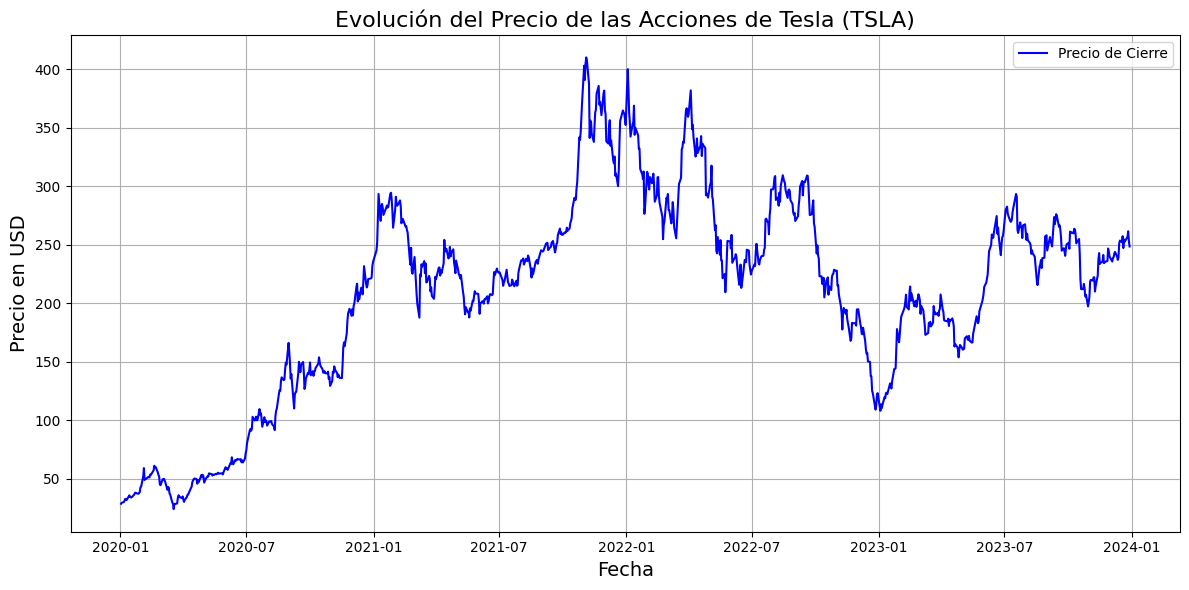

In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Definir la función make_graph
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], color='blue', label='Precio de Cierre')
    plt.title(title, fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Precio en USD', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Descargar datos históricos de Tesla (TSLA)
tesla_data = yf.download('TSLA', start='2020-01-01', end='2023-12-31')
tesla_data.reset_index(inplace=True)

# Llamar a la función para graficar
make_graph(tesla_data, 'Evolución del Precio de las Acciones de Tesla (TSLA)')

[*********************100%***********************]  1 of 1 completed


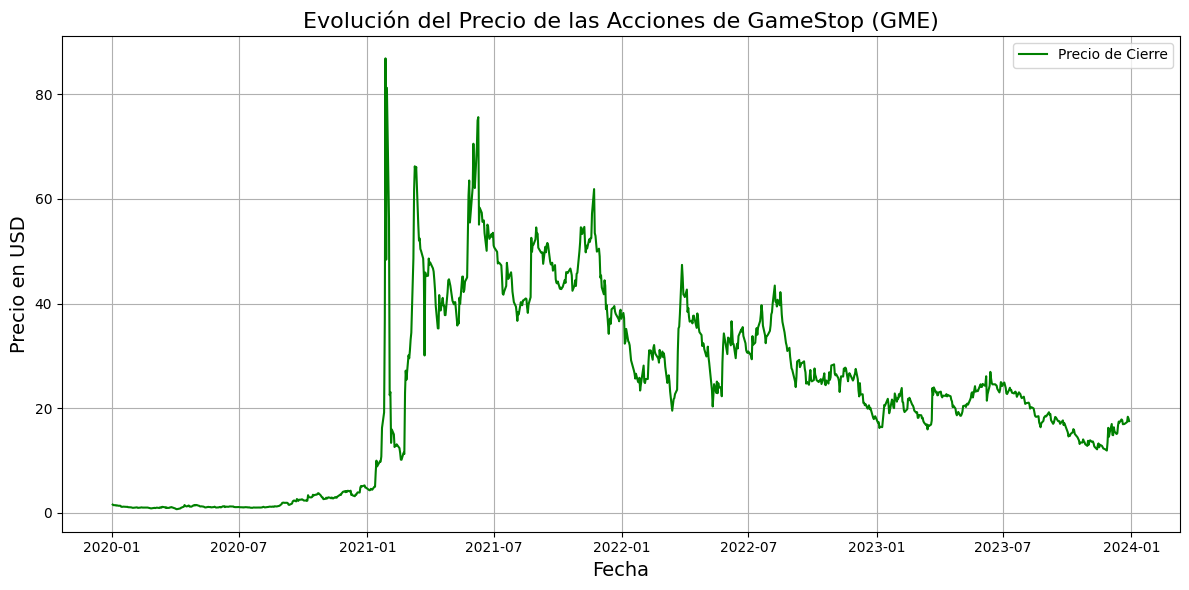

In [17]:
# Importar las bibliotecas necesarias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Definir la función make_graph (si no está ya definida)
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['Date'], data['Close'], color='green', label='Precio de Cierre')
    plt.title(title, fontsize=16)
    plt.xlabel('Fecha', fontsize=14)
    plt.ylabel('Precio en USD', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Descargar datos históricos de GameStop (GME)
gme_data = yf.download('GME', start='2020-01-01', end='2023-12-31')
gme_data.reset_index(inplace=True)

# Llamar a la función para graficar
make_graph(gme_data, 'Evolución del Precio de las Acciones de GameStop (GME)')